Amazon is the biggest retailer in the world without having any store. It only sells products over the internet; we called it **e-commerce**. In the last years, the 'online-store' has been rising because it increases the revenue, 24/7 income, reduces the cost of store's facility, cashiers, and the massive amount of data it collects.
When a website tracks and records its users' actions (i.e. times spend on the page, research, transaction), companies learn more about their customers and then offer them better products and services. This notebook will see some tools and statistical techniques to analyze customers' data and how companies may benefit from this analysis to improve marketing campaigns, personalizing the customer experience, predicting trends, and forecast demand.

This is a transnational **data set** that contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The dataset is composed of:

- INvoiceNo
- StockCode
- Description
- Quantity
- InvoiceDate
- UnitPrice
- CustomerID
- Country


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dff  = pd.read_csv("../input/ecommerce-data/data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})
dff

In [ ]:
dff.info()

In [ ]:
dff.shape

In [ ]:
duplicated = dff.duplicated().sum()
print(duplicated)
dff.drop_duplicates(inplace= True)

In [ ]:
#transfore the data type
dff['InvoiceDate']= pd.to_datetime(dff['InvoiceDate'])


In [ ]:
dff.describe()

In [ ]:
#we have negtive value for quantity and price
df = dff[(dff['Quantity']>0) & (dff['UnitPrice']>0)]

In [ ]:
df[['Quantity', 'UnitPrice']].describe()

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df['Quantity'], df['UnitPrice'])
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
plt.show()

From the graph above, it is difficult to interpret the relation between Quantity and UnitPrice because of outliers.

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df[['Quantity','UnitPrice']]))
df = df[(z < 3).all(axis=1)]

In [ ]:
df.describe()

In [ ]:
df = df[(df['Quantity']>=0) | (df['UnitPrice']>=0)]

In [ ]:
sns.boxplot(df['Quantity'])

In [ ]:
sns.boxplot(df['UnitPrice'])

In [ ]:
dff.shape

In [ ]:
df.isna().sum()

In [ ]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df['Hour']=df['InvoiceDate'].dt.hour
df['Month']=df['InvoiceDate'].dt.month
df['Weekdays']= df['InvoiceDate'].dt.weekday

In [ ]:
df['Hour'].unique()

# WHAT IS RFM ?

**Recency, Frequency, Monetary** (RFM) is a marketing tool that uses historical transactions to group your clients into meaningful categories.  It uses three factors:

* Recency: How many days ago was their last purchase?
* Frequency: How many times has the customer purchased from our store?
* Monetary: How much the customer spent?

Interpreting one of these three variables separately does not tell you too much. For instance, a client who made a significant purchase six months ago cannot be identified as an essential customer. However, with a combination of the RFM, called **RFM score**, it is easier to segment it. 

To conduct you **RFM analysis**, the first step is to rank the three variables with a score of 1 (low) to 5(important). With the variable frequency, score 1 will gather 20% of people who come less, whereas 5 means the customers who shop the most frequently. Once you assess all the rank, you concatenate them. It assigns a three-digit RFM score (from 111 to 555) to each customer.  A 555 indicates that a customer has purchased a product or service very recently, most frequently, and at the highest monetary value.

RFM is a powerful tool during your marketing campaign. It tells you which segmented group is more likely to respond to your current campaign, which client they should pay more attention to. Therefore, companies decrease the churn rate, focus on the potential and profitable customers.



**TABLE OF CLIENTS:**

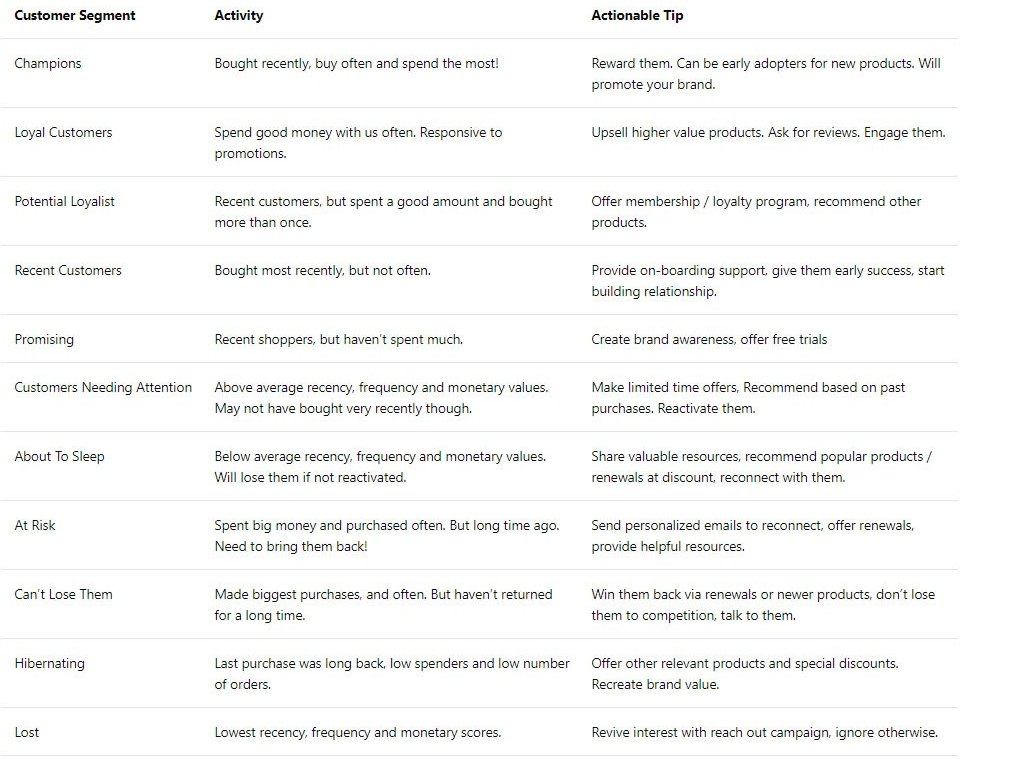

In [ ]:
rfm = df.copy()

In [ ]:
rfm

In [ ]:
#because we are looking at the customer and not the product we drop InvoiceNo and Stcokcode
ab = df.groupby('CustomerID').agg({'InvoiceDate': 'min','TotalAmount': 'sum'})
ab.rename(columns={'InvoiceDate': "Recency",('InvoiceDate', 'nunique'): "Frequency","TotalAmount": 'Monetization'},  inplace = True)
frequency = df.groupby('CustomerID').agg({'InvoiceDate':'nunique'})
frequency.rename(columns={'InvoiceDate': "Frequency"}, inplace = True)

rfm = pd.merge(ab,frequency, on='CustomerID')

#rfm.rename(columns={('InvoiceDate',     'min'): "Recency",('InvoiceDate', 'nunique'): "Frequency","TotalAmount": 'Monetization'})

In [ ]:
a = rfm.reset_index()


In [ ]:
rfm.rename(columns={'InvoiceDate': "Recency",'InvoiceDate': "Frequency","TotalAmount": 'Monetization'})

In [ ]:
rfm.describe()

In [ ]:
#We save the most recent date to, then , calulate the recency
e = df['InvoiceDate'].min()
print('minimun :'+ str(e))


In [ ]:
rfm.info()

In [ ]:
###create receny, cad calculate the last time he bought something compare to e
rfm['Recency'] = rfm['Recency'].apply(lambda x : (x - e).days)

In [ ]:
#why do we rank it and how?
rfm['Rank_Recency'] = pd.qcut( rfm['Recency'],q=5, labels = range(6, 1, -1))
rfm['Rank_Recency'] = pd.to_numeric(rfm['Rank_Recency'])

In [ ]:
def freq(x):
    if x ==1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    elif x == 4:
        return 4
    else: 
        return 5

rfm['Rank_Frequency'] =rfm['Frequency'].apply(freq)

#rfm['Rank_Frequency'] = pd.qcut( rfm['Frequency'],q=5, labels = range(1, 6, 1))
#rfm['Rank_Frequency'] = pd.to_numeric(rfm['Rank_Frequency'])

In [ ]:
rfm['Rank_Monetization'] = pd.qcut( rfm['Monetization'],q=5, labels = range(1, 6, 1))
rfm['Rank_Monetization'] = pd.to_numeric(rfm['Rank_Monetization'])

In [ ]:
rfm['RFM_Score'] = rfm['Rank_Recency'].astype(str)+ rfm['Rank_Frequency'].astype(str) + rfm['Rank_Monetization'].astype(str)
rfm['Score'] = rfm['Rank_Recency']+ rfm['Rank_Frequency']+ rfm['Rank_Monetization']

In [ ]:
rfm.describe()

In [ ]:
rfm.info()

In [ ]:
def client_segment(x):
    if x == 15:
        return 'Champions'
    elif  x >= 14:
        return 'Loyal Customers'
    elif  x >= 11:
        return 'Can’t Lose Them'
    elif  x >= 9:
        return 'Potential Loyalist'
    elif  x >= 7:
        return 'Promising'
    elif  x >= 6:
        return 'Needs Attention'
    elif  x >= 5:
        return 'At Risk'
    else:
        return 'Lost'

In [ ]:
rfm['Clients'] = rfm['Score'].apply(client_segment)


In [ ]:
rfm


In [ ]:
clients = rfm[['Clients', 'Frequency', 'Monetization', 'Recency']].groupby('Clients').median()
clients.reset_index(inplace = True)

In [ ]:
ax = sns.barplot(x="Frequency", y="Clients", data=clients)
ax.set_ylabel('Clients')
ax.set_title('Median Visits')

In [ ]:
ax = sns.barplot(x="Monetization", y="Clients", data=clients)
ax.set_ylabel('Clients')
ax.set_title('Median Expenditure')

In [ ]:
ax = sns.barplot(x="Recency", y="Clients", data=clients)
ax.set_ylabel('Clients')
ax.set_title('Median time from last shop ')

In [ ]:
rfm['Clients'].unique()

In [ ]:
import squarify

squarity =rfm['Clients'] .value_counts()
color=['grey','orange','pink','purple', 'brown', 'blue', 'green', 'red']


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
squarify.plot(sizes= squarity , 
              label=['Promising',
                     'Can’t Lose Them',
                     'Potential Loyalist',
                     'Loyal Customer',
                     'Promising', 
                     'Needs Attention',
                     'At Risk',
                     'Champions',
                     'Lost',] ,color = color, alpha=0.5,)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [ ]:
squarity


**Interpretation**

We have a deeper understanding of our segmentations from the graphs above, from the median expenditure to each group's number. Among the visualization, we observe three horizontal histograms (median frequency, median monetization and median recency for every group of clients) and one squarity.

As we can see in the Median Expenditure graph, our two best categories of clients are champions (in green) and loyal customer(in purple). As we can see, both clients provide almost 80% of our revenue and only represent 22% of our total clients! This follows the 80/20 rule, also known as the Pareto Principle, attributed to the Italian economist Vilfredo Pareto. In one of his papers, Pareto noted that about 80% of Italy's land belonged to approximately 20% of its total population.

This is a presentation of the three different users:

**Champions** gather 300 customer who has a median expenditure of $2446 and comes almost every month. For marketers, they should be the most critical clients because they make your market sustainable. In this case, you must regularly reward with the promotion or provide to them privilege access.

**Potential Loyalist** represents 15% of our customers.  They play an essential role in the growth of the market.  They already show interest in the brand. The next step is to acquire them by building a relationship.

**Customers that need attention** constitutes 10% of our market. They spend and come below the average. We translated this with a potential loss, increased churn. It is vital to reactive interest with discounts and recommendations. Moreover, you may also receive feedback to improve your process.

In [ ]:
clients

In [ ]:
rfm['Clients'].value_counts()

CLUSTER

**Unsupervised** is a type of machine learning that concludes from a data set without a target variable. We usually implement this method to find a hidden pattern or understand the structure of the data. It discovers information that may not be visible to the human eye. The most popular method is clustering.

**Clustering** split your data set into several groups. The group are formed of similar data point compared to the other group. We can use this approach for marketing segmentation, medical imaging, and anomaly detection. They are different types of clustering methods, including:


* Partitioning methods
* Hierarchical clustering
* Fuzzy clustering
* Density-based clustering
* Model-based clustering

**Analogy:**

You had a box of apples of different colors; red, green, and mixed colors. Individually picking each color would not only consume time but is likely to entail manifestations of human error. However, with cluster analysis, we can segment these different apples according to color. With such information, one can harvest information such as how many apples belong to which color, which color is of the best quality, or which color has the least quality.

In [ ]:
cluster = rfm.drop(['Rank_Recency','Rank_Frequency','Rank_Monetization','RFM_Score','Score','Clients'], axis = 1)


# K-means clustering algorithm 

K-means is one of the most straightforward clustering analysis to implement. It attempts to divide the dataset into a fixed number k of a group.  The **k** refers to the number of centroids you want in your model. A centroid is a point at the center of each cluster. The algorithm then allocates every data point to the nearest cluster while keeping it as small as possible.

The appropriate number of clusters is essential for an optimal score. In marketing, a wrong evaluation of it can result in a poor marketing campaign. For example,  If you have five kinds of customers, but you only allow them to be segmented into two groups. Your campaign will not target the right audience, which is translated into a low return on investment (ROI)

# How do you determine the optimal number?

The **elbow method** is one of the best approaches. It runs the model x times with a different value of k. Then, it computes the sum of square error for each iteration and illustrates the outcome with a line chart, which looks like an arm(see elbow method graph). Finally, the value of k is the elbow on the arm. Sometimes, it might be difficult to assess your k with a small range of possibilities.

An additional metric is the silhouette score. The range of the score is between -1(bad) to 1(good). It computes *(b-a)/max(a,b)* where:

* A is the average distance among data points from the same cluster.
* B is the average distance among the cluster.




In [ ]:
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [ ]:
X= MinMaxScaler().fit_transform(cluster)
#x = StandardScaler().fit_transform(X)

The **MinMaxScaler** scales and translates each feature individually such that it is in the given range on the training set (e.g. between zero and one)

In [ ]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

In [ ]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [ ]:
k_means_5 = KMeans(n_clusters=6)
model = k_means_5.fit(X)
y_hat_5 = k_means_5.predict(X)
labels_5 = k_means_5.labels_
metrics.silhouette_score(X, labels_5, metric = 'euclidean')
#metrics.calinski_harabasz_score(X, labels_5)

In [ ]:
cluster['Cluster'] = labels_5

In [ ]:
table = cluster.groupby('Cluster').agg({'Recency': 'mean', 'Frequency':'mean', 'Monetization': 'mean'})
table['Number of user'] = cluster['Cluster'].value_counts()
table

**Interpretation**

In our case, from the K-means model, as a result, we segment our clients into six groups. They are distributed from the smallest cluster 4, with 558 people, and the most prominent cluster 5 with  888

In the summary table, we see the **Cluster 5** tends to gather the most profitable and regular clients with an average amount of $4900. On the contrary, **Cluster 1** does not contribute to the company's market, translated with low expenditure, and rarely comes.

# DO UPVOTE AND COMMENT IF YOU FIND THIS NOTEBOOK HELPFUL
# PLEASE COMMENT ANY SUGGESTION